In [17]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
# from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Activation
# from keras.layers.recurrent import LSTM
# from keras.models import load_model
import keras
import h5py
import time

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model

In [41]:
path_data_sp = r"Dataset\SP500 2012 2022.xlsx"

#read dataset
data_sse = pd.read_csv(path_data_sse, sep= ',')
data_sp = pd.read_excel(path_data_sp)

In [42]:
data_sp = data_sp.set_index('Date')
data_sp.index = pd.to_datetime(data_sp.index)
data_sp.head()

,Open,High,Low,Close*,Adj Close**,Volume,lag1,lag2,lag3,lag4,...,MAD (3),Mov Avg (4),MAD (4),Mov Avg (5),MAD (5),distance (5),Mov Avg (10),MAD (10),Mov Avg (20),MAD (20)
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,1402.43,1426.74,1398.11,1426.19,1426.19,3204330000,1426.19,1426.19,1426.19,1426.19,...,0.000000,1426.1900,0.000000,1426.19,0.0,0.0,1426.19,0.0,1426.19,0.0
2013-01-02,1426.19,1462.43,1426.19,1462.42,1462.42,4202600000,1426.19,1462.42,1462.42,1462.42,...,0.000000,1462.4200,0.000000,1462.42,0.0,0.0,1462.42,0.0,1462.42,0.0
2013-01-03,1462.42,1465.47,1455.53,1459.37,1459.37,3829730000,1462.42,1426.19,1459.37,1459.37,...,0.000000,1459.3700,0.000000,1459.37,0.0,0.0,1459.37,0.0,1459.37,0.0
2013-01-04,1459.37,1467.94,1458.99,1466.47,1466.47,3424290000,1459.37,1462.42,1426.19,1466.47,...,0.011828,1466.4700,0.000000,1466.47,0.0,0.0,1466.47,0.0,1466.47,0.0
2013-01-07,1466.47,1466.47,1456.62,1461.89,1461.89,3304970000,1466.47,1459.37,1462.42,1426.19,...,-0.000590,1453.6125,0.005694,1461.89,0.0,0.0,1461.89,0.0,1461.89,0.0


In [43]:
data_sp.shape

(2519, 24)

In [44]:
#Add IF factor into dataframe
iso = IsolationForest(n_estimators=1000)
iso.fit_predict(data_sp[['Close*', 'MAD (5)']])
data_sp['IF MAD (5)'] = iso.decision_function(data_sp[['Close*', 'MAD (5)']])
iso.fit_predict(data_sp[['Close*', 'MAD (10)']])
data_sp['IF MAD (10)'] = iso.decision_function(data_sp[['Close*', 'MAD (10)']])
iso.fit_predict(data_sp[['Close*', 'MAD (20)']])
data_sp['IF MAD (20)'] = iso.decision_function(data_sp[['Close*', 'MAD (20)']])
iso.fit_predict(data_sp[['Close*', 'MAD (2)']])
data_sp['IF MAD (2)'] = iso.decision_function(data_sp[['Close*', 'MAD (2)']])
iso.fit_predict(data_sp[['Close*', 'MAD (3)']])
data_sp['IF MAD (3)'] = iso.decision_function(data_sp[['Close*', 'MAD (3)']])
iso.fit_predict(data_sp[['Close*', 'MAD (4)']])
data_sp['IF MAD (4)'] = iso.decision_function(data_sp[['Close*', 'MAD (4)']])


In [7]:
# data_sp['IF MAD (5)']= data_sp['IF MAD (5)'].where(data_sp['IF MAD (5)']==1, 0)

In [139]:
#split dataset
# train = data_sp.loc[data_sp.index < '2020-12-31']
# test = data_sp.loc[data_sp.index >= '2020-12-31']

FEATURE = [['lag1','lag2', 'lag3', 'lag4', 'lag5'],
           ['lag1','lag2', 'MAD (2)', 'IF MAD (2)'],
           ['lag1','lag2', 'lag3', 'MAD (2)', 'IF MAD (2)', 'MAD (3)', 'IF MAD (3)'],
           ['lag1','lag2', 'lag3', 'lag4', 'MAD (2)', 'IF MAD (2)', 'MAD (3)', 'IF MAD (3)', 'MAD (4)', 'IF MAD (4)'],
           ['lag1','lag2', 'lag3', 'lag4', 'lag5', 'MAD (2)','MAD (3)', 'MAD (4)', 'MAD (5)', 'IF MAD (5)', 'IF MAD (4)', 'IF MAD (3)', 'IF MAD (2)'],
           ['lag1','lag2', 'lag3', 'lag4', 'lag5', 'MAD (5)', 'IF MAD (5)'],
           ['lag1','lag2', 'lag3', 'lag4', 'lag5', 'MAD (10)', 'IF MAD (10)'],
           ['lag1','lag2', 'lag3', 'lag4', 'lag5', 'MAD (20)', 'IF MAD (20)']]

TARGET = ['Close*']

# test.shape

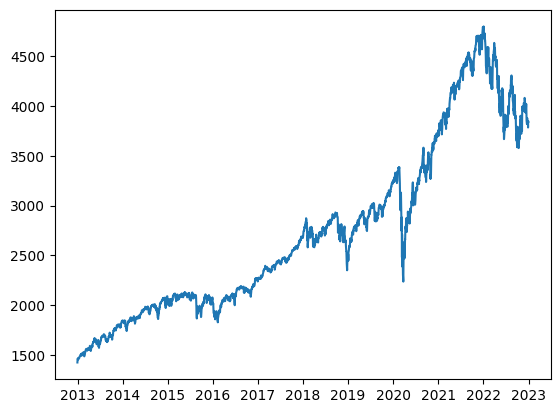

In [140]:
plt.plot(data_sp['Close*'])
plt.show()

In [141]:
# Normalization
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_sp[FEATURE[3]+TARGET].values)

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

x_train, y_train = train[:,:-1], train[:,-1:]
x_test, y_test = test[:,:-1], test[:,-1:]

# Reshape the input data for LSTM 
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Create the LSTM network
n_feature = dataset.shape[1]-1
model = Sequential()
model.add(LSTM(20, input_shape=(1, n_feature)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
start = time.time()
history= model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2, validation_data=(x_test, y_test))
end = time.time()
print(f'Successfully train the model, time taken: {end-start} seconds')

# Forecast
trainPredict = np.hstack((train[:,:-1],model.predict(x_train)))
testPredict = np.hstack((test[:,:-1],model.predict(x_test)))

# Calculate the model performance
# decode predictions from normalization
trainPredict = min_max_scaler.inverse_transform(trainPredict)
train = min_max_scaler.inverse_transform(train)
testPredict = min_max_scaler.inverse_transform(testPredict)
test = min_max_scaler.inverse_transform(test)

2015 504
Epoch 1/20


c:\Users\ROSYID\OneDrive - UGM 365\MAD-IF-XGBoost\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2015/2015 - 5s - 3ms/step - loss: 0.0039 - val_loss: 4.8869e-04
Epoch 2/20
2015/2015 - 4s - 2ms/step - loss: 2.5232e-05 - val_loss: 2.4324e-04
Epoch 3/20
2015/2015 - 4s - 2ms/step - loss: 1.3810e-05 - val_loss: 2.3374e-04
Epoch 4/20
2015/2015 - 4s - 2ms/step - loss: 1.5074e-05 - val_loss: 3.6913e-04
Epoch 5/20
2015/2015 - 4s - 2ms/step - loss: 1.1902e-05 - val_loss: 1.5936e-04
Epoch 6/20
2015/2015 - 4s - 2ms/step - loss: 1.6491e-05 - val_loss: 5.9001e-04
Epoch 7/20
2015/2015 - 3s - 2ms/step - loss: 1.2906e-05 - val_loss: 4.1883e-04
Epoch 8/20
2015/2015 - 4s - 2ms/step - loss: 1.1585e-05 - val_loss: 5.6995e-04
Epoch 9/20
2015/2015 - 4s - 2ms/step - loss: 8.7392e-06 - val_loss: 5.3915e-04
Epoch 10/20
2015/2015 - 4s - 2ms/step - loss: 1.1090e-05 - val_loss: 2.7187e-04
Epoch 11/20
2015/2015 - 4s - 2ms/step - loss: 8.2996e-06 - val_loss: 1.6001e-04
Epoch 12/20
2015/2015 - 4s - 2ms/step - loss: 8.1648e-06 - val_loss: 4.9838e-04
Epoch 13/20
2015/2015 - 4s - 2ms/step - loss: 7.8291e-06 - val_l

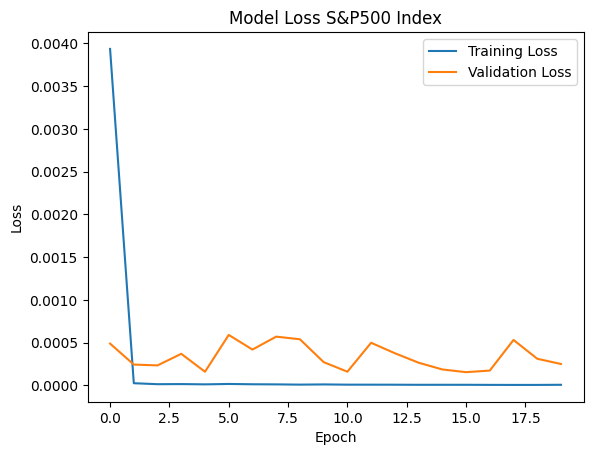

In [142]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss S&P500 Index')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def eval(y, predict):
    
    # Mean absolute error (MAE)
    mae = mean_absolute_error(y, predict)
    # Mean squared error (MSE)
    mse = mean_squared_error(y, predict)
    # # Root Mean Square Error (RMSE)
    rmse = sqrt(mse)
    #r_square
    r2 = r2_score(y, predict)
    #mape
    mape= mean_absolute_percentage_error(y, predict)

    # Print metrics
    # print('Mean Absolute Error:', round(mae, 3))
    # print('Mean Squared Error:', round(mse, 3))
    # print('RMSE:', round(rmse, 3))

    return [r2, mape, rmse, mae]

In [144]:
# Performance score
r2, mape, rmse, mae = eval(train[:,-1:], trainPredict[:,-1:])
print(f'Train Score => R2: {r2*100: .2f}%, MAPE: {mape*100: .2f}%, RMSE: {rmse: .2f}, MAE: {mae: .2f}')
r2, mape, rmse, mae = eval(test[:,-1:], testPredict[:,-1:])
print(f'Test Score => R2: {r2*100: .2f}%, MAPE: {mape*100: .2f}%, RMSE: {rmse: .2f}, MAE: {mae: .2f}')

Train Score => R2:  99.99%, MAPE:  0.20%, RMSE:  5.12, MAE:  4.20
Test Score => R2:  96.89%, MAPE:  1.06%, RMSE:  53.30, MAE:  46.18


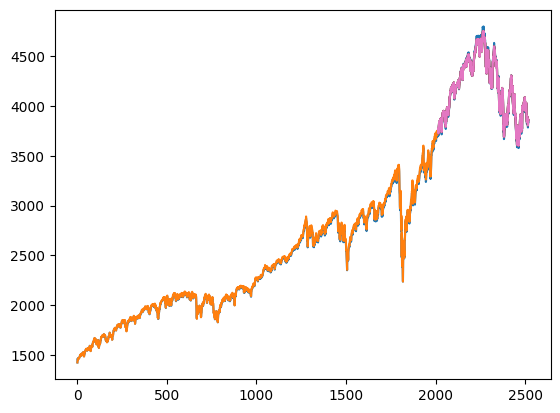

In [132]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset[:,-1:])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(trainPredict[:,-1:]), :] = trainPredict[:,-1:]
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict[:,-1:]):len(dataset), :] = testPredict[:,-1:]
# plot baseline and predictions
dataset_decode= min_max_scaler.inverse_transform(dataset)
plt.plot(dataset_decode[:,-1:])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

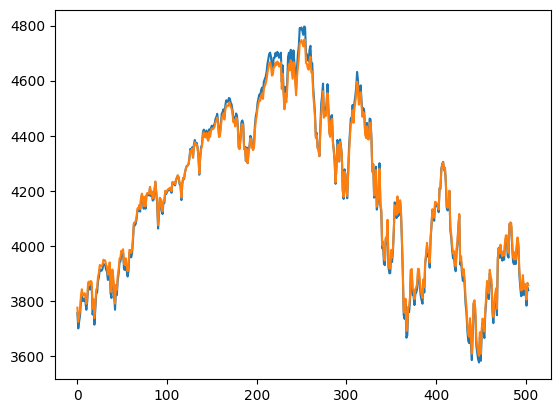

In [133]:
f, (ax1) = plt.subplots(1,1)
ax1.plot(list(test[:,-1:]))
ax1.plot(testPredict[:,-1:])

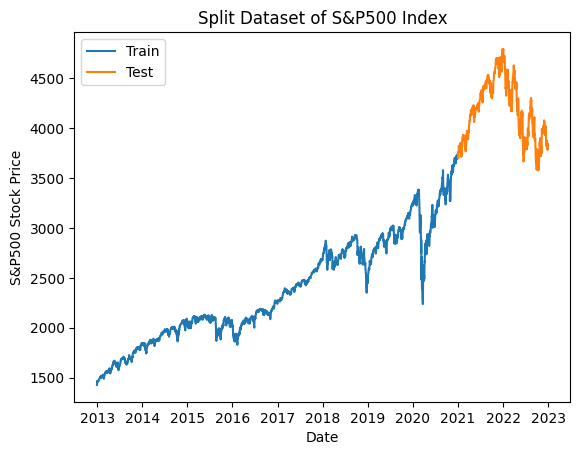

In [134]:
testPlot = np.empty_like(dataset)
testPlot[:, :] = np.nan
testPlot[len(train[:,-1:]):len(dataset), :] = test[:,-1:]
plt.plot(data_sp[:len(train[:,-1:])].index, train[:,-1:], label= 'Train')
plt.plot(data_sp.index, testPlot[:,-1:], label= 'Test')
plt.title('Split Dataset of S&P500 Index')
plt.xlabel('Date')
plt.ylabel('S&P500 Stock Price')
plt.legend()
plt.show()

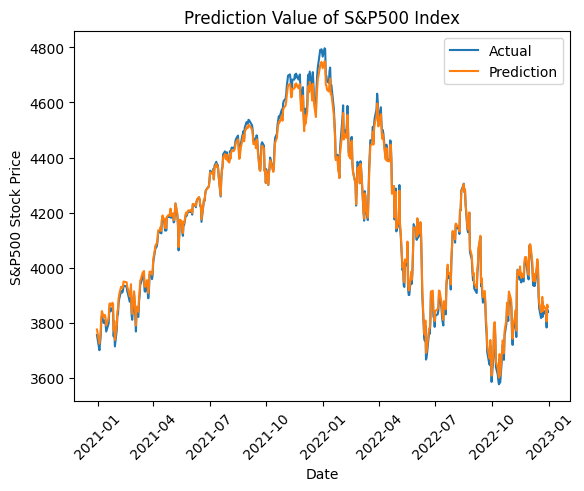

In [135]:
plt.plot(data_sp[-len(test[:,-1:]):].index, test[:,-1:], label= 'Actual')
plt.plot(data_sp[-len(test[:,-1:]):].index, testPredict[:,-1:], label= 'Prediction')
plt.title('Prediction Value of S&P500 Index')
plt.xlabel('Date')
plt.ylabel('S&P500 Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

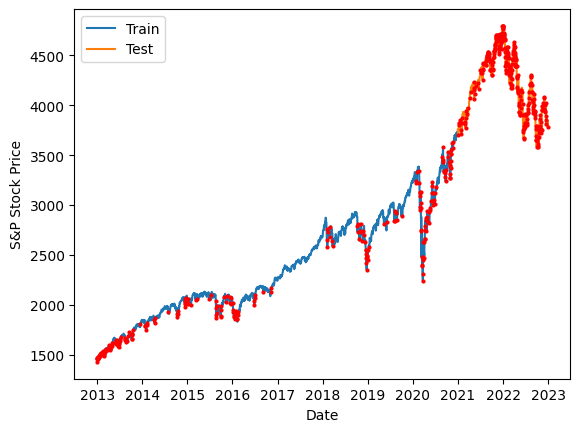

In [136]:
plt.plot(data_sp[:len(train[:,-1:])].index, train[:,-1:], label= 'Train')
plt.plot(data_sp.index, testPlot[:,-1:], label= 'Test')
plt.plot(data_sp.index, data_sp['Close*'].where(data_sp['IF MAD (3)']<0), marker= 'o', markersize= 2, color= 'r', linewidth=0)
plt.xlabel('Date')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Isolation Forest Value of S&P500 Index')

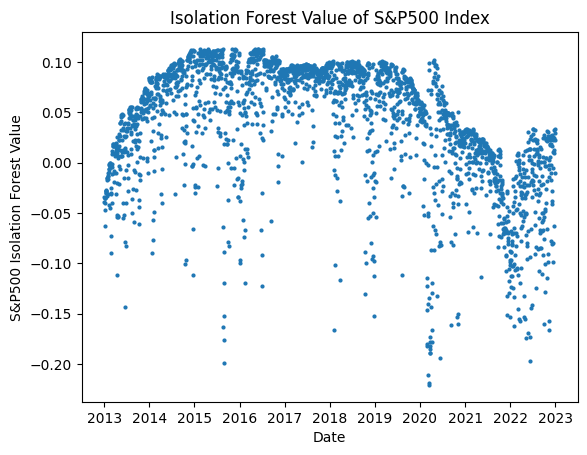

In [137]:
plt.plot(data_sp.index, data_sp['IF MAD (3)'], marker= 'o', markersize= 2, linewidth=0)
plt.xlabel('Date')
plt.ylabel('S&P500 Isolation Forest Value')
plt.title('Isolation Forest Value of S&P500 Index')